# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

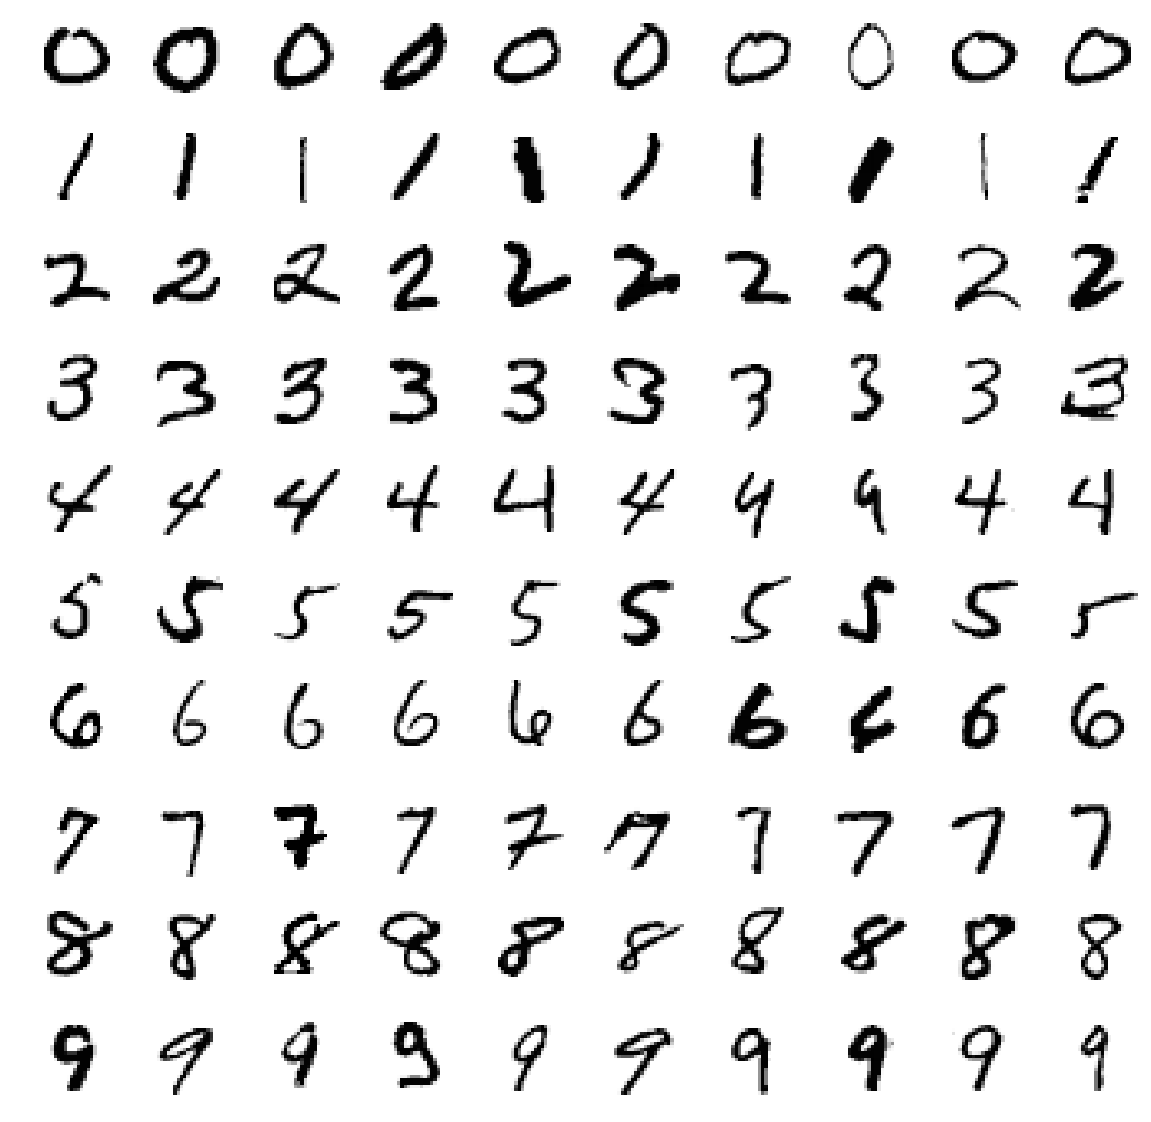

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    # Setup the plot matrix
    plt.subplots(nrows=10, ncols=num_examples, figsize=(20,20))
    plt.rc('image',cmap='Greys')   # Sets the colormap to grayscale
        
    for digit in range (0,10):
        indices = np.where(Y==digit)
        for digitloc in range(0,num_examples):
            # Reshape each row to 28x28 matrix
            X_digit = np.reshape(X[indices[0][digitloc]],(28,28))
            plt.subplot(10,num_examples,digit*num_examples+digitloc +1)
            # plot the image
            plt.axis('off')
            plt.imshow(X_digit)
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    

### STUDENT START ###
    for k in k_values:
            
        fit_model = KNeighborsClassifier(n_neighbors=k) 
        fit_model.fit(mini_train_data,mini_train_labels)  # fitting the model with the mini train data set
        predict = fit_model.predict(dev_data) # Using devdata to evaluate the model
        c = confusion_matrix(dev_labels, predict)
        accuracy = fit_model.score(dev_data,dev_labels) # Calculating accuracy 
        if k==1: print("Classification report for k = 1: \n ",classification_report(dev_labels, predict)) # Printing classification report
        print("Accuracy on the dev set for k = " + str(k) + " is:" , accuracy)
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification report for k = 1: 
               precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Accuracy on the dev set for k = 1 is: 0.888
Accuracy on the dev set for k = 3 is: 0.878
Accuracy on the dev set for k = 5 is: 0.869
Accuracy on the dev set for k = 7 is: 0.865
Accuracy on the dev set for k = 9 is: 0.863


ANSWER: The most difficult digit is : 9 , because of the lowest F1 score.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
     
     for train_size in train_sizes:
        fit_model = KNeighborsClassifier(n_neighbors=1) # K = 1 neighbor
        
        time_begin = time.time()  # Timer Start
        train_subset_data  = train_data[:train_size] # Training data subset
        train_subset_labels = train_labels[:train_size] # Training labels subset
        fit_model.fit(train_subset_data,train_subset_labels) # Fit the model with the subset of the data
        predict = fit_model.predict(dev_data) # use the model to predict
        time_total = time.time() - time_begin # Timer End
        
        c = confusion_matrix(dev_labels, predict)
        accuracy = fit_model.score(dev_data,dev_labels)
        accuracies.append(accuracy) # Creating the accuracy liat
        print("Time to predict(training size {0}): {1:.2f} sec. with the accuracy of {2}.".format(train_size,time_total,accuracy))

        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)
print("Accuracies: ", accuracies)



Time to predict(training size 100): 0.11 sec. with the accuracy of 0.72.
Time to predict(training size 200): 0.21 sec. with the accuracy of 0.786.
Time to predict(training size 400): 0.42 sec. with the accuracy of 0.841.
Time to predict(training size 800): 0.96 sec. with the accuracy of 0.884.
Time to predict(training size 1600): 1.76 sec. with the accuracy of 0.902.
Time to predict(training size 3200): 3.46 sec. with the accuracy of 0.926.
Time to predict(training size 6400): 7.02 sec. with the accuracy of 0.937.
Time to predict(training size 12800): 14.31 sec. with the accuracy of 0.959.
Time to predict(training size 25000): 29.41 sec. with the accuracy of 0.97.
Accuracies:  [0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Predicted accuracy value for 60000 training size is :  [1.24307226]


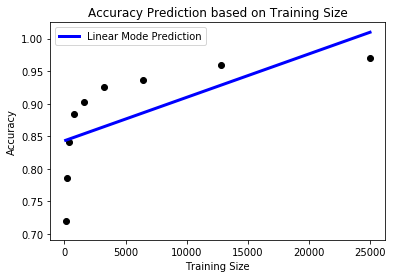

In [6]:
def P4():

### STUDENT START ###

    fit_model = LinearRegression()
    #Reshape the List to 9x1 vector for both train_size and the accuracies
    fit_model.fit(np.array(train_sizes).reshape(9,1),np.array(accuracies).reshape(9,1))    
    predict = fit_model.predict(60000)
    print("Predicted accuracy value for 60000 training size is : ", predict[0])
    
    #Visual representation of the accuracy for different training sizes.
    plt.xlabel ("Training Size")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Prediction based on Training Size")
    plt.scatter(train_sizes, accuracies,  color='black')
    plt.plot(train_sizes, fit_model.predict(np.array(train_sizes).reshape(9,1)), color='blue', linewidth=3,label="Linear Mode Prediction")
    plt.legend(loc="best")
    
### STUDENT END ###

P4()

ANSWER: The relationship between Accuracy and the training size will not continue to grow in the linear fasion and the accuracy can never be more than 1. The abovev plot also confirms that accuracy never reaches 1. so linear regression is an example of wrong use here.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

Confusion Matrix: 
 [[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
Few Samples: 


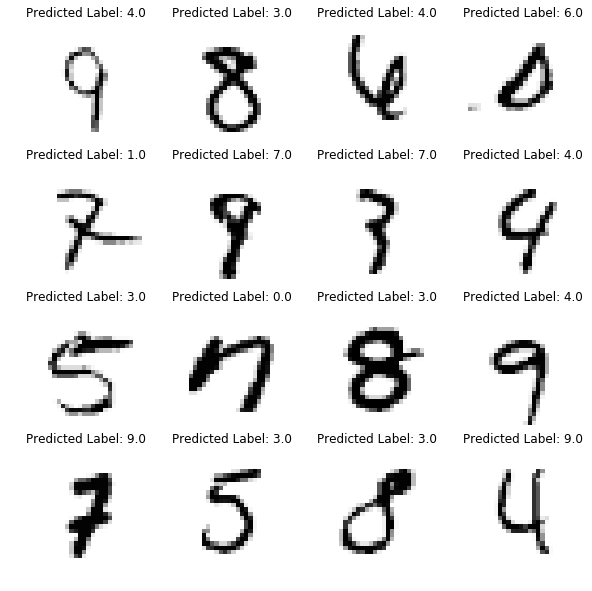

In [7]:
def P5():

### STUDENT START ###
    ax = plt.subplots(nrows=4,ncols=4,figsize=(10,10))
    fit_model = KNeighborsClassifier(n_neighbors=1)
    
    # Fit the model using mini train data set
    fit_model.fit(mini_train_data,mini_train_labels)
    predict = fit_model.predict(dev_data)
    
    # Build the confusion matrix
    c = confusion_matrix(dev_labels, predict)
    print("Confusion Matrix: \n", c, end= '\n')

    # Find where the prediction goes wrong
    dev_data_mismatch = np.where(predict !=dev_labels)
    
    print("Few Samples: ",end='\n')
    
    # Plot few examples of incorrect classification
    for i in range(0,16):
        ax = plt.subplot(4,4,i+1)
        ax.set_title("Predicted Label: {label}".format(label=predict[dev_data_mismatch[0][i]]))
        ax.axis('off')
        ax.imshow(dev_data[dev_data_mismatch[0][i]].reshape(28,28))

    
### STUDENT END ###

P5()

The most confused digits are [2 and 9]. They both have 20 incorrect classifications as seen in the confusion matrix above

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [8]:
def gaussian_blur(arr):  # Method to introduce smoothness by blurring
        
    # Simple Blurring logic takes the 8 adjacent pixels values and averages out 
    digits = arr.shape[0]
    new_digit = np.zeros((28, 28))
    new_array = np.zeros(arr.shape)
    for digit in range(digits):  # Take one row (digit at a time from the given array)
        current_digit = arr[digit].reshape(28,28) # Conver that into 28x28 array so the calculation is easier
        #print("processing:" , digit)
        for prow in range(28):
            for pcol in range(28):
                if pcol ==0 or prow ==0 or pcol == 27 or prow ==27:  # Leave out the corner cells and edge rows and columns
                    new_digit[prow,pcol] = current_digit[prow,pcol]
                    #print(pcol)
                else:  
                    # Use the simple logic of averaging the adjacent pixels
                    new_value = (current_digit[prow,pcol] + \
                    current_digit[prow, pcol-1] + current_digit[prow-1,pcol-1] + \
                    current_digit[prow-1,pcol] + current_digit[prow-1,pcol+1] + \
                    current_digit[prow,pcol+1] + current_digit[prow+1,pcol+1] + current_digit[prow+1,pcol] + \
                    current_digit[prow+1,pcol-1])/9
                    #print(current_digit[prow,pcol], new_value)
                    
                    new_digit[prow,pcol] = new_value
                    
                    # Reconstruct the vector array                
        new_array[digit] = new_digit.reshape(1,784)
    return new_array
        

In [9]:
# Current run time of this function is approximately 4 mins.

def P6():

    ### STUDENT START ###
    # Using the Knn algorithm with k=1 
    fit_model = KNeighborsClassifier(n_neighbors=1)

    #preprocess the training data but not the dev data
    print("Preprocessing train_data........")
    blur_train_data = gaussian_blur(train_data)
    print("Preprocessing train_data complete.")

    #preprocess the dev data but not the training data
    print("Preprocessing dev_data........")
    blur_dev_data = gaussian_blur(dev_data)
    print("Preprocessing dev_data complete.")


    #Fit the model with the preprocessed training data

    fit_model.fit(blur_train_data,train_labels)
    #Evaluation of the model
    print ('Accuracy of Blurred training data only:', fit_model.score(dev_data, dev_labels))


    #Fit the model with the preprocessed dev data
    fit_model.fit(train_data,train_labels)
    #Evaluation of the model
    print ('Accuracy of Blurred dev data only:', fit_model.score(blur_dev_data, dev_labels))


    #preprocess both training and dev data
    fit_model.fit(blur_train_data,train_labels)
    #Evaluation of the model
    print ('Accuracy of Blurred both dev and training data:', fit_model.score(blur_dev_data, dev_labels)) 


    ### STUDENT END ###


P6()


Preprocessing train_data........
Preprocessing train_data complete.
Preprocessing dev_data........
Preprocessing dev_data complete.
Accuracy of Blurred training data only: 0.982
Accuracy of Blurred dev data only: 0.962
Accuracy of Blurred both dev and training data: 0.979


(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [13]:
def P7():

### STUDENT START ###

    #Bernoulli Model
    
    fit_model = BernoulliNB( binarize=0.0) # using binarize argument to classifying into binary values
    fit_model.fit(mini_train_data, mini_train_labels)
    predict = fit_model.predict(dev_data)
    c = confusion_matrix(dev_labels, predict)
    accuracy = fit_model.score(dev_data, dev_labels)
    print("\nConfusion Matrix(Bernoulli): \n\n", c)
    print("\nAccuracy (Bernoulli): \n", accuracy)
    print("\nClassification report (Bernoulli) : \n ",classification_report(dev_labels, predict))
    
    #Multinomial Model
    
    def preprocess(arr):  # Function to mapping the pixel values to 0 , 1 or 2
        new_arr = np.zeros(arr.shape)
        for row in range(arr.shape[0]):
            for col in range(arr.shape[1]):
                cell_value = arr[row,col]
                if cell_value > 0 and cell_value <= 0.9:   # Assumption (Logic): 
                    new_arr[row,col]=1.0                       # if original value = 0 then 0 , original value < 0.9 then 1
                elif cell_value > 0.9:                     # orignial value >= 0.9 then 2
                        new_arr[row,col]=2.0
        return new_arr

    new_train_data = preprocess(mini_train_data)  #Preprocess the training data
    fit_model = MultinomialNB(alpha=1.0) # Using Multinomial 
    fit_model.fit(new_train_data, mini_train_labels)
    predict = fit_model.predict(dev_data)
    c = confusion_matrix(dev_labels, predict)
    accuracy = fit_model.score(dev_data, dev_labels)
    print("\nConfusion Matrix(Multinomial): \n\n", c)
    print("\nAccuracy (Multinomial): \n", accuracy)
    print("\nClassification report (Multinomial) : \n ",classification_report(dev_labels, predict))
        
### STUDENT END ###

P7()


Confusion Matrix(Bernoulli): 

 [[ 96   0   0   1   0   0   2   0   0   0]
 [  0 101   0   0   0   1   1   0   2   0]
 [  4   1  80   6   0   0   2   3   6   0]
 [  0   2   5  64   0   3   2   1   7   2]
 [  0   0   1   0  81   0   3   2   6  11]
 [  3   2   0  19   4  57   3   0   0   3]
 [  3   3   2   0   2   1  87   0   0   0]
 [  1   5   1   1   2   2   0  86   1  14]
 [  0   4   1   8   0   4   0   0  74   5]
 [  2   0   2   3   2   2   0   2   4  89]]

Accuracy (Bernoulli): 
 0.815

Classification report (Bernoulli) : 
               precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        99
        1.0       0.86      0.96      0.91       105
        2.0       0.87      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.89      0.78      0.83       104
        5.0       0.81      0.63      0.71        91
        6.0       0.87      0.89      0.88        98
        7.0       0.91      0.76      0.

ANSWER: Further classifying the training data into three categories doesn't seem to improve the overall performance of the model over binomial NB model. The accuracy and the F1 score tend to be little lower than the binomial model. The additional classification of the features doesnt add any additional information to the model.


(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [14]:
def P8(alphas):

### STUDENT START ###
    
    fit_model = BernoulliNB(binarize=0.5)
    # Use the Grid Search for parameter tuning
    grid = GridSearchCV(estimator=fit_model, param_grid=alphas)
    
    # Evaluating using Dev Data set
    grid.fit(mini_train_data,mini_train_labels)  
    return grid
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

# Print the values of the grid score for each parameter.
for values in nb.grid_scores_:
    print(values)

/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


mean: 0.80300, std: 0.01644, params: {'alpha': 0.0}
mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}
mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}
mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}
mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}
mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}
mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}
mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}
mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}


ANSWER: The accuracy when alpha = 0.01 is highest among the other values of the parameter [Using mini_train data for the evaluation]. The accuracy when alpha = 0 is 0.827, it is expected be lower when there is no smoothing.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [15]:
def P9():

### STUDENT END ###
    
    #GaussianNB model
    fit_model_G = GaussianNB()
    fit_model_G.fit(train_data, train_labels)
    predict = fit_model_G.predict(dev_data)
    print ("Accuracy using GaussianNB : ", fit_model_G.score(dev_data,dev_labels))
    
    #BernoulliNB Model
    fit_model_B = BernoulliNB()
    fit_model_B.fit(train_data, train_labels)
    predict = fit_model_B.predict(dev_data)
    print ("Accuracy using BernoulliNB : ", fit_model_B.score(dev_data,dev_labels))
    
    #GaussianNB model with noise added
    mean = train_data.mean()
    sigma = np.std(train_data)
    noise = np.random.normal(mean, sigma, train_data.shape)
    noise_train_data = np.array(train_data + noise)
    
    fit_model_G.fit(noise_train_data, train_labels)
    noise = np.random.normal(mean, sigma, dev_data.shape)
    noise_dev_data = np.array(dev_data + noise)
    print ("Accuracy using GaussianNB after adding noise: ", fit_model_G.score(noise_dev_data,dev_labels))
    

### STUDENT END ###

gnb = P9()

Accuracy using GaussianNB :  0.571
Accuracy using BernoulliNB :  0.826
Accuracy using GaussianNB after adding noise:  0.817


ANSWER: The accuracy of the GuassianNB improved from 0.563 to 0,818 after adding noise around the mean. Gaussian expect the sample distribution to be normatl and that is not the case with the data. So adding noise around the mean makes it more normal and hence improves the accuracy which is closer to BernoulliNB.


(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

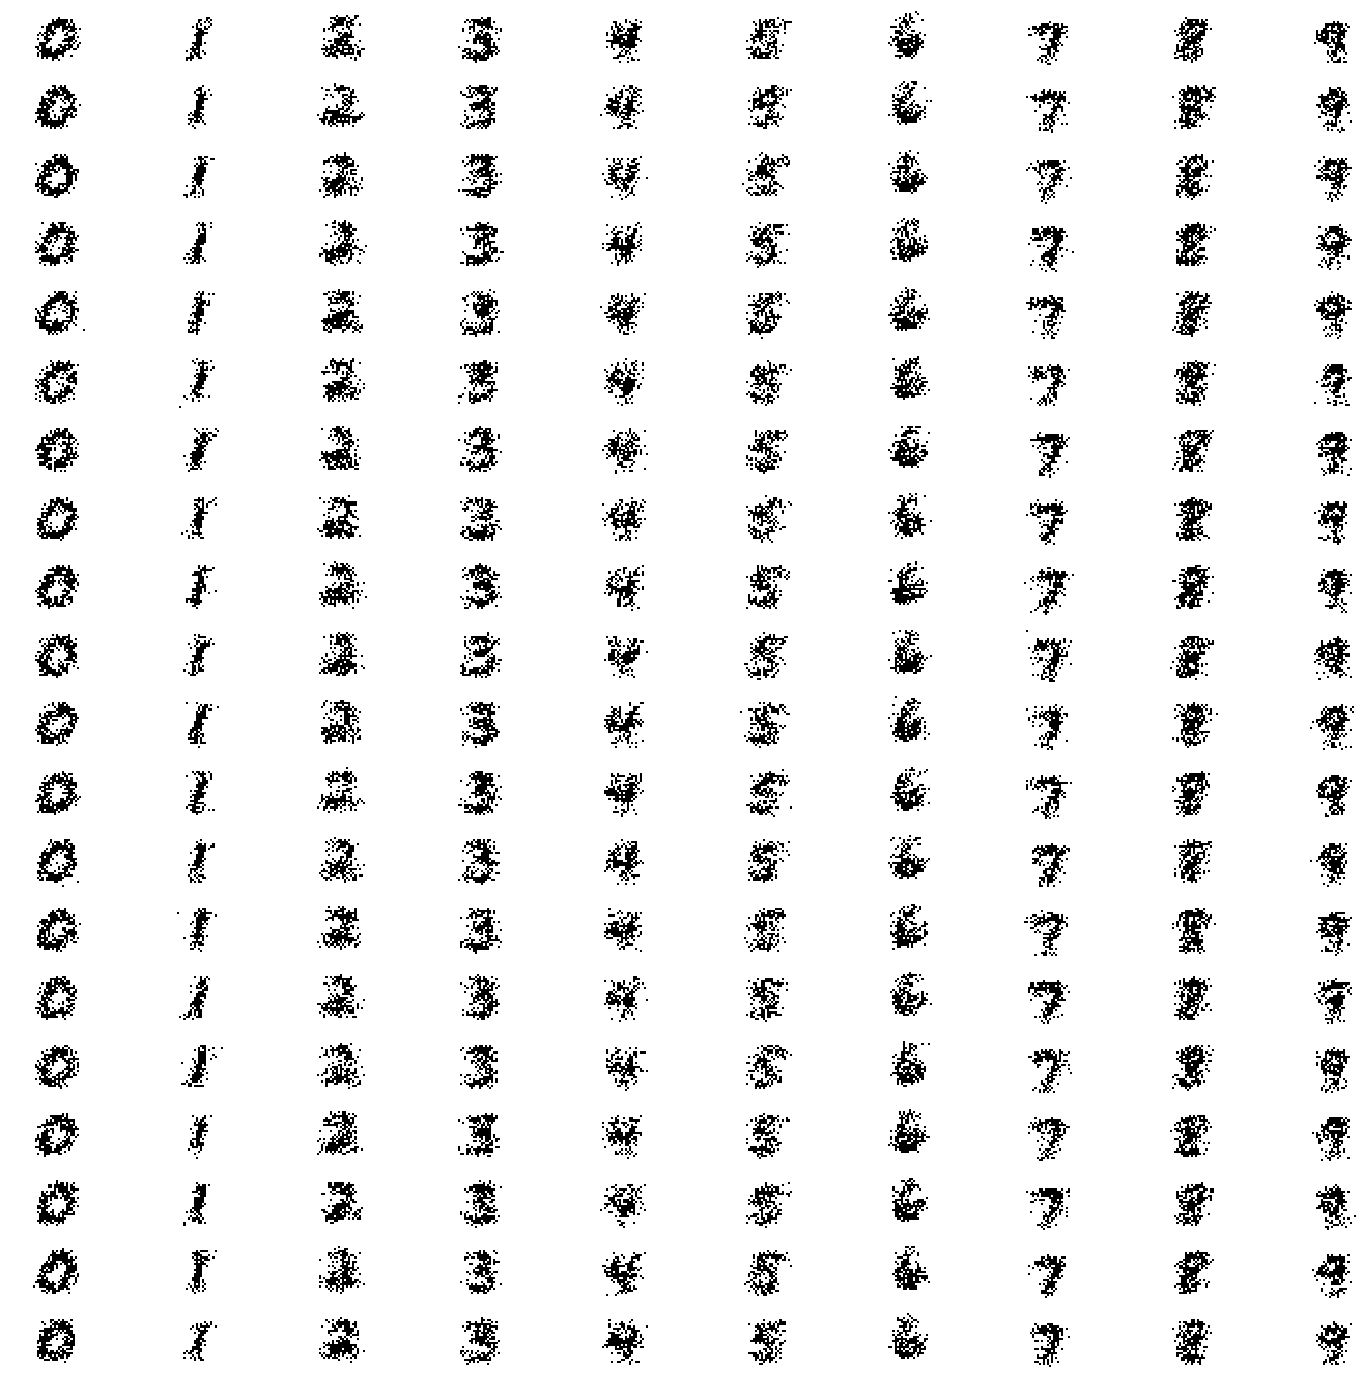

In [16]:
def P10(num_examples):

### STUDENT START ###

    fit_model = BernoulliNB(binarize=0.0) # Use the Bernoulli Classifier
    fit_model.fit(train_data, train_labels)
    plt.subplots(nrows=20, ncols=10, figsize=(25,25))
    plt.rc('image',cmap='Greys') 

    for digit in range(0,10):
        #using the _log_prob_, find the actual probability for each digit
        digit_prob = np.exp(fit_model.feature_log_prob_)[digit]
        for count in range(0,num_examples):
            # Re-generate the feature vectors by using the probability of the fitted model 
            feature = [np.random.choice([1,0],  p=[digit_prob[pixel],1-digit_prob[pixel]]) for pixel in range(0,784)]
            feature = np.reshape(feature,(28,28))
            
            #Plot the reconstructed digit
            plt.subplot(20,10,(count*10) + digit + 1)
            plt.axis('off')
            plt.imshow(feature)


### STUDENT END ###




P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    
    fit_model = BernoulliNB(alpha=0.001, binarize=0.5)
    fit_model.fit(train_data, train_labels)
    predict = fit_model.predict(dev_data)
    
    pbucket=0
    for bindex, bvalue in enumerate(buckets):
        for pindex,pvalue in enumerate(fit_model.predict_proba(dev_data)):
            if pvalue.max() <= buckets[bindex] and pvalue.max() > pbucket:
                total[bindex] +=1
                if predict[pindex] == dev_labels[pindex]:
                    correct[bindex] +=1
        pbucket= buckets[bindex]

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   3    accuracy = 0.333
p(pred) <= 0.9000000000000    total =  42    accuracy = 0.571
p(pred) <= 0.9990000000000    total =  95    accuracy = 0.495
p(pred) <= 0.9999900000000    total =  76    accuracy = 0.645
p(pred) <= 0.9999999000000    total =  62    accuracy = 0.710
p(pred) <= 0.9999999990000    total =  71    accuracy = 0.873
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.893
p(pred) <= 0.9999999999999    total =  81    accuracy = 0.926
p(pred) <= 1.0000000000000    total = 495    accuracy = 0.972


ANSWER: The accuracy increases as the predicted probability increases. It is a weak calssifier as the accuracy still around 0.55 even when the probability is 0.999.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():
    

### STUDENT START ###
mini_train_data_v2 = np.copy(mini_train_data)

#Add all the features and create a new feature "Total"
total = np.sum(mini_train_data_v2,axis=1)
mini_train_data_v2 = np.append(mini_train_data_v2,np.array(total).reshape(mini_train_data_v2.shape[0],1),axis=1)

dev_data_v2 = np.copy(dev_data)
total = np.sum(dev_data_v2,axis=1)
dev_data_v2 = np.append(dev_data_v2,np.array(total).reshape(dev_data_v2.shape[0],1),axis=1)

fit_model = BernoulliNB(alpha=0.001, binarize=0.5)

#Evaluate the model with mini_train_data
fit_model.fit(mini_train_data, mini_train_labels)
print(fit_model.score(dev_data,dev_labels))

#Evaluate the model with mini_train_data (with appended column for the sum)
fit_model.fit(mini_train_data_v2, mini_train_labels)
print(fit_model.score(dev_data_v2,dev_labels))

### STUDENT END ###

#P12()

0.819
0.819


ANSWER: Adding all the features didn't really change the accuracy in this case.